# üß† Clasificaci√≥n: Predicci√≥n de Churn en Telecom X

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [2]:
# Cargar el dataset
df = pd.read_csv("df_limpio_telecomx.csv")

# Eliminar columna identificadora
df.drop("customerID", axis=1, inplace=True)

# Convertir columna objetivo a binaria
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Identificar columnas categ√≥ricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


## 1. Transformaci√≥n de datos categ√≥ricos

In [3]:
# Verificaci√≥n del tama√±o y divisi√≥n del dataset
print("Tama√±o total del dataset:", df_encoded.shape)

# Divisi√≥n 80/20 recomendada para datasets medianos o grandes
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Tama√±o del set de entrenamiento:", X_train.shape)
print("Tama√±o del set de prueba:", X_test.shape)


Tama√±o total del dataset: (7043, 32)
Tama√±o del set de entrenamiento: (5634, 31)
Tama√±o del set de prueba: (1409, 31)


## 2. Separaci√≥n de variables predictoras y variable objetivo

In [4]:
# Variables predictoras (X) y objetivo (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Escalamiento de variables num√©ricas
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


## 3. Divisi√≥n de datos en entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## ‚öñÔ∏è An√°lisis de Proporci√≥n de Clases (Balance)

Conteo de Clases:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporci√≥n de Clases:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


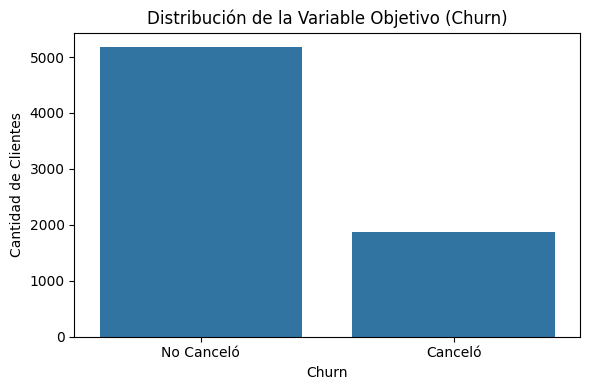

In [6]:
# An√°lisis de la variable Churn
conteo = df["Churn"].value_counts()
proporcion = df["Churn"].value_counts(normalize=True)

print("Conteo de Clases:")
print(conteo)
print("\nProporci√≥n de Clases:")
print(proporcion)

# Visualizaci√≥n
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo.index, y=conteo.values)
plt.xticks([0, 1], ["No Cancel√≥", "Cancel√≥"])
plt.title("Distribuci√≥n de la Variable Objetivo (Churn)")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()


## üìä An√°lisis de Variables Clave vs Cancelaci√≥n

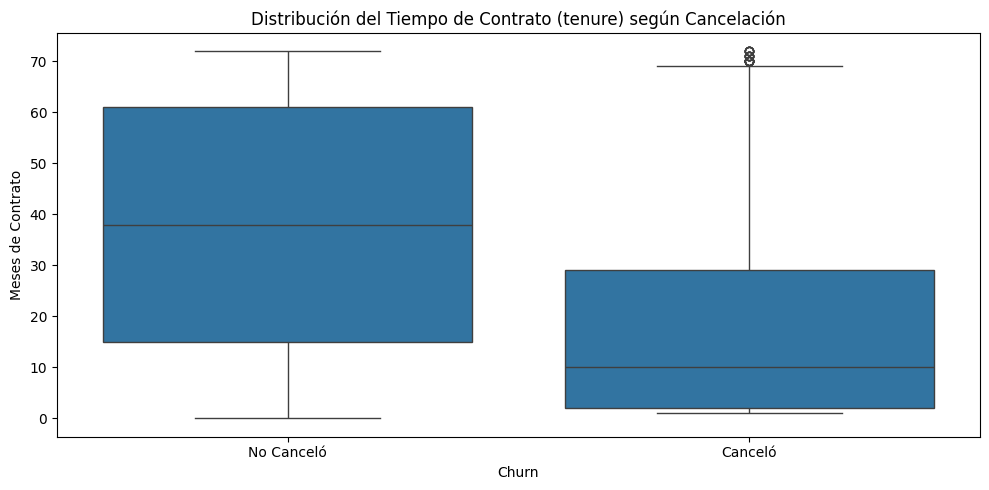

In [7]:
# Boxplot: Tiempo de Contrato vs Cancelaci√≥n
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="customer.tenure")
plt.title("Distribuci√≥n del Tiempo de Contrato (tenure) seg√∫n Cancelaci√≥n")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato")
plt.xticks([0, 1], ["No Cancel√≥", "Cancel√≥"])
plt.tight_layout()
plt.show()


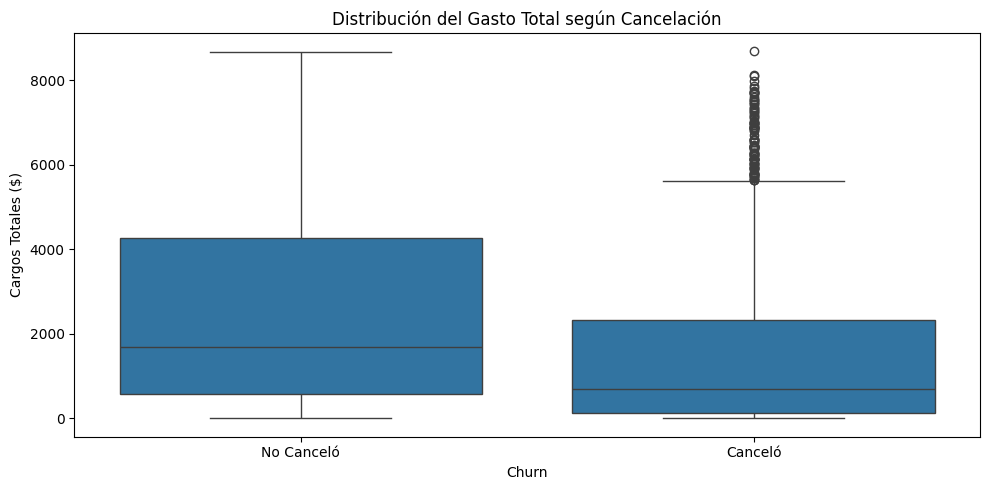

In [8]:
# Boxplot: Gasto Total vs Cancelaci√≥n
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="account.Charges.Total")
plt.title("Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n")
plt.xlabel("Churn")
plt.ylabel("Cargos Totales ($)")
plt.xticks([0, 1], ["No Cancel√≥", "Cancel√≥"])
plt.tight_layout()
plt.show()


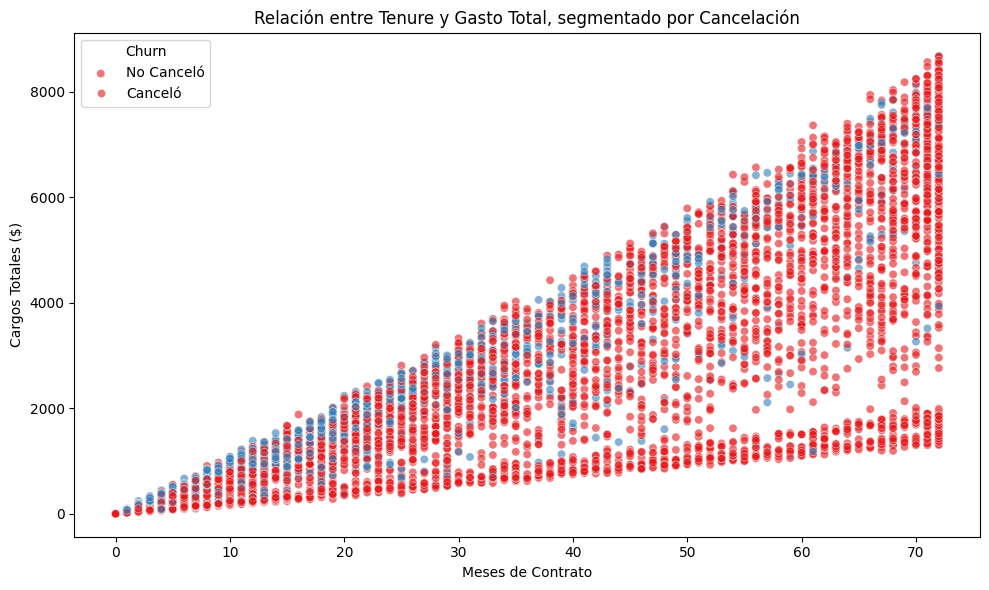

In [9]:
# Scatter Plot: Tenure vs Gasto Total por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="customer.tenure", y="account.Charges.Total", hue="Churn", palette="Set1", alpha=0.6)
plt.title("Relaci√≥n entre Tenure y Gasto Total, segmentado por Cancelaci√≥n")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargos Totales ($)")
plt.legend(title="Churn", labels=["No Cancel√≥", "Cancel√≥"])
plt.tight_layout()
plt.show()


## üß™ Evaluaci√≥n de la Necesidad de Normalizaci√≥n

Antes de aplicar modelos de machine learning, es importante considerar si es necesario **normalizar** o **estandarizar** los datos.

### ¬øCu√°ndo es necesario?

| Tipo de Modelo                     | ¬øRequiere Normalizaci√≥n? |
|-----------------------------------|---------------------------|
| K-Nearest Neighbors (KNN)         | ‚úÖ S√≠                     |
| Support Vector Machines (SVM)     | ‚úÖ S√≠                     |
| Regresi√≥n Log√≠stica               | ‚úÖ S√≠                     |
| Redes Neuronales (MLP, etc.)      | ‚úÖ S√≠                     |
| √Årbol de Decisi√≥n                 | ‚ùå No                     |
| Random Forest                     | ‚ùå No                     |
| XGBoost                           | ‚ùå No                     |

üîé En este an√°lisis:

- Ya se aplic√≥ **normalizaci√≥n** mediante `MinMaxScaler`, lo cual es adecuado para modelos como **KNN**.
- Esta transformaci√≥n **no afecta negativamente** a modelos basados en √°rboles como **Random Forest** o **Decision Tree**.

‚úÖ Por lo tanto, **no se requiere aplicar estandarizaci√≥n adicional**, y la preparaci√≥n actual de los datos es adecuada para los modelos usados en este notebook.


## 4. Entrenamiento y evaluaci√≥n de modelos de clasificaci√≥n

### Modelo 1: √Årbol de decisi√≥n

In [10]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("√Årbol de Decisi√≥n - Reporte de Clasificaci√≥n")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_dt))


√Årbol de Decisi√≥n - Reporte de Clasificaci√≥n
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1562
           1       0.65      0.43      0.52       551

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusi√≥n:
[[1435  127]
 [ 314  237]]


### Modelo 2: Random Forest

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Reporte de Clasificaci√≥n")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest - Reporte de Clasificaci√≥n
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1562
           1       0.64      0.48      0.55       551

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusi√≥n:
[[1417  145]
 [ 289  262]]


### üìâ Matriz de Confusi√≥n - Random Forest

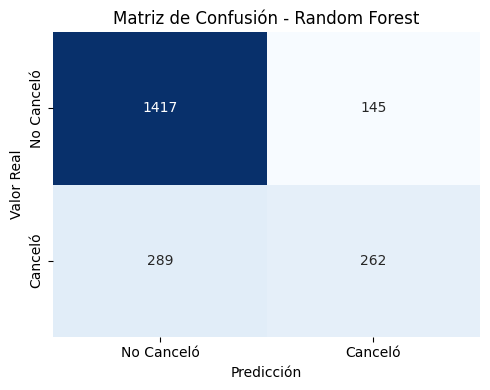

In [12]:
# Matriz de confusi√≥n - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Cancel√≥', 'Cancel√≥'],
            yticklabels=['No Cancel√≥', 'Cancel√≥'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n - Random Forest')
plt.tight_layout()
plt.show()

### Modelo 3: K-Nearest Neighbors (KNN)

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN - Reporte de Clasificaci√≥n")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_knn))


KNN - Reporte de Clasificaci√≥n
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1562
           1       0.54      0.52      0.53       551

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113

Matriz de Confusi√≥n:
[[1320  242]
 [ 264  287]]


## 5. An√°lisis de la importancia de variables (Random Forest)

### Modelo 4: Red Neuronal (MLPClassifier)

In [14]:
from sklearn.neural_network import MLPClassifier

# Entrenamiento del modelo
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Red Neuronal - Reporte de Clasificaci√≥n")
print(classification_report(y_test, y_pred_mlp))


Red Neuronal - Reporte de Clasificaci√≥n
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1562
           1       0.62      0.53      0.57       551

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


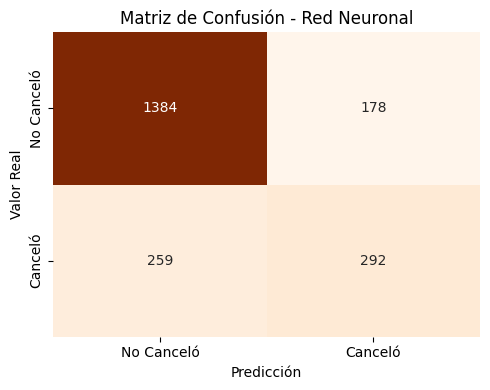

In [15]:
# Matriz de confusi√≥n para Red Neuronal
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No Cancel√≥', 'Cancel√≥'],
            yticklabels=['No Cancel√≥', 'Cancel√≥'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n - Red Neuronal')
plt.tight_layout()
plt.show()


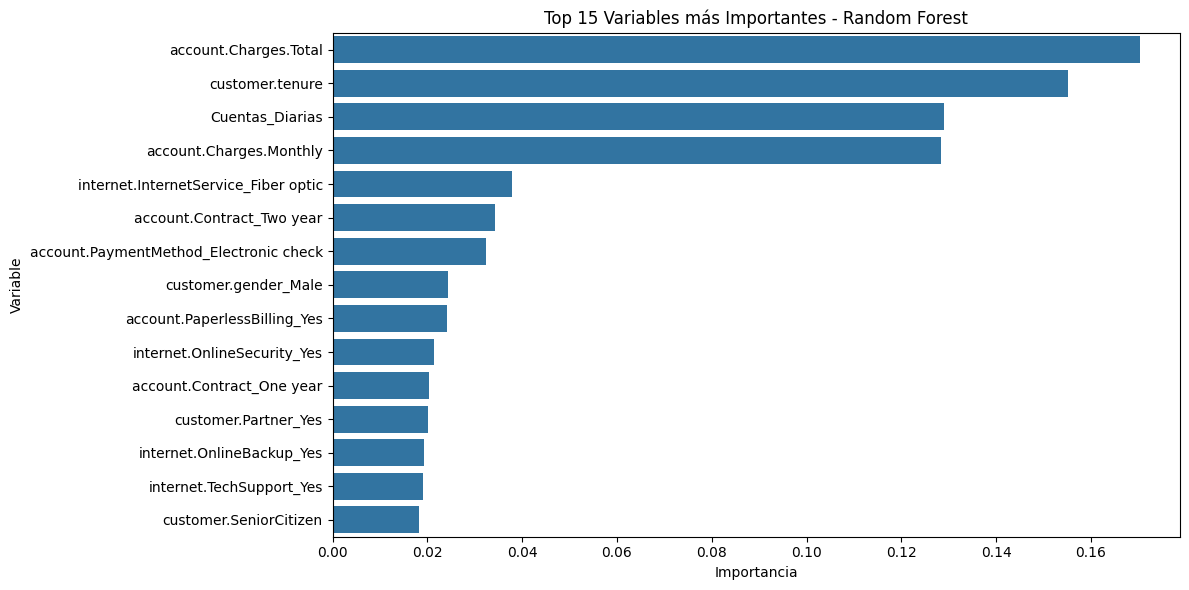

In [16]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Variables m√°s Importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


## üî• Mapa de Calor de Correlaci√≥n

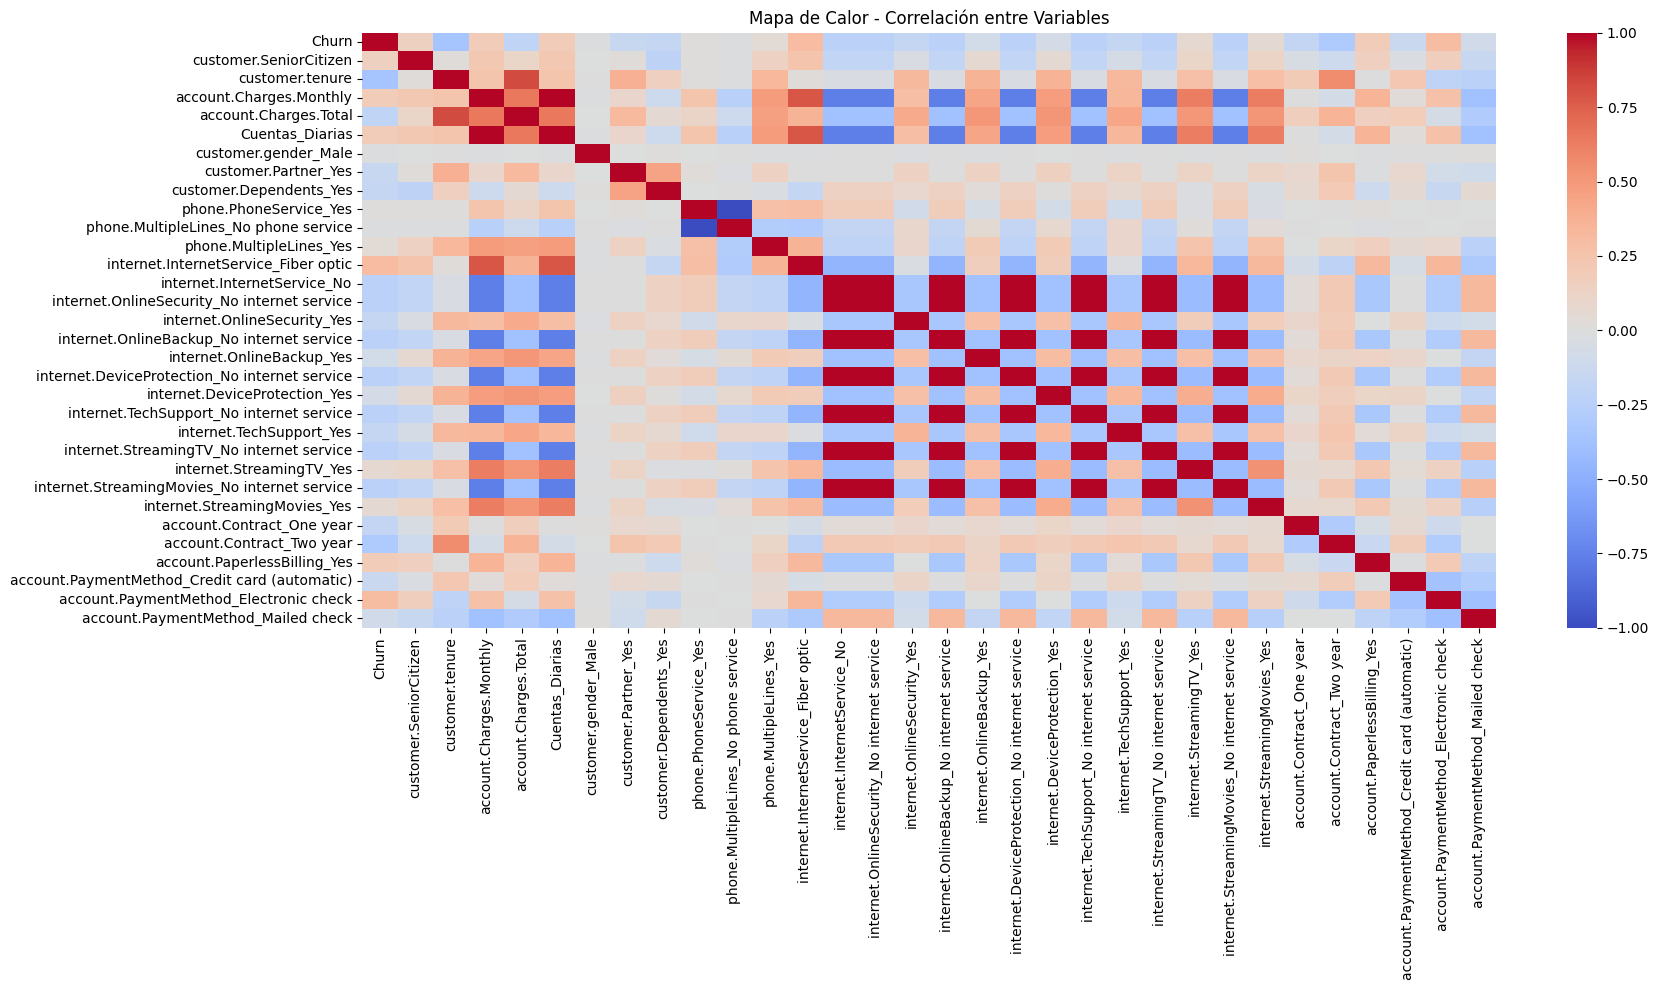

In [17]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Mapa de Calor - Correlaci√≥n entre Variables")
plt.tight_layout()
plt.show()

## üìä Boxplots para variables clave

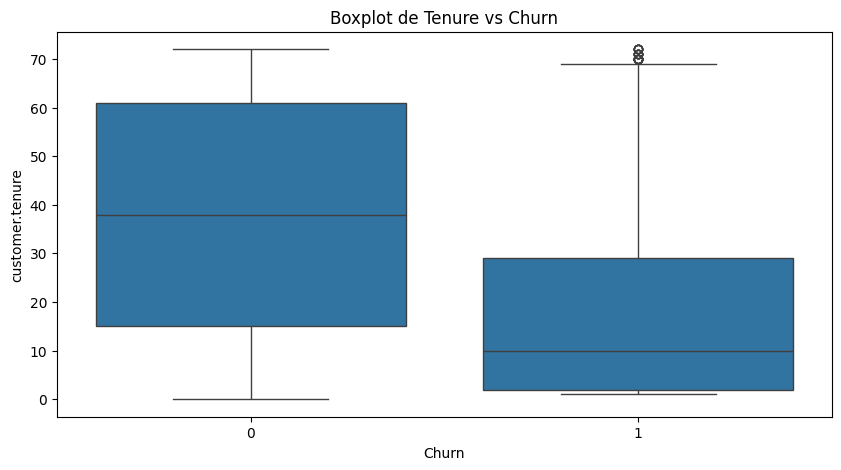

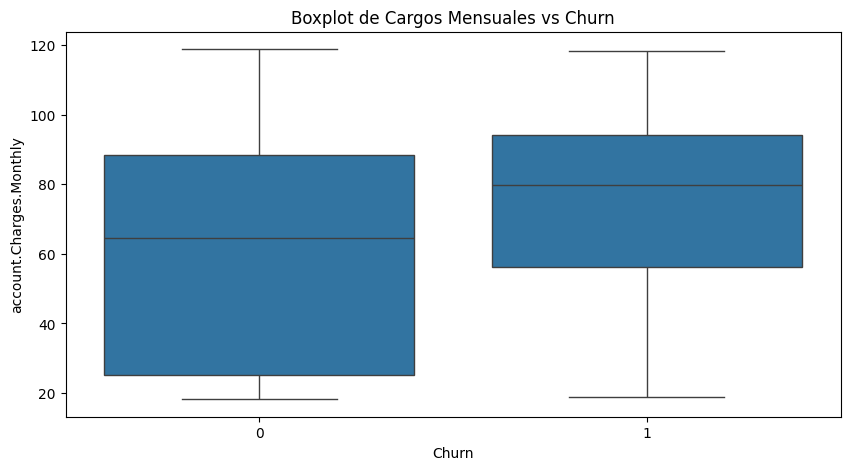

In [18]:
# Boxplot de tenure
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="customer.tenure")
plt.title("Boxplot de Tenure vs Churn")
plt.show()

# Boxplot de Monthly Charges
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="account.Charges.Monthly")
plt.title("Boxplot de Cargos Mensuales vs Churn")
plt.show()

## ‚öôÔ∏è Modelo de Referencia - Baseline

In [19]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

print("Modelo Baseline (Mayor√≠a):")
print(classification_report(y_test, y_pred_baseline))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_baseline))

Modelo Baseline (Mayor√≠a):
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1562
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113

Matriz de Confusi√≥n:
[[1562    0]
 [ 551    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## üå≥ Visualizaci√≥n del √Årbol de Decisi√≥n

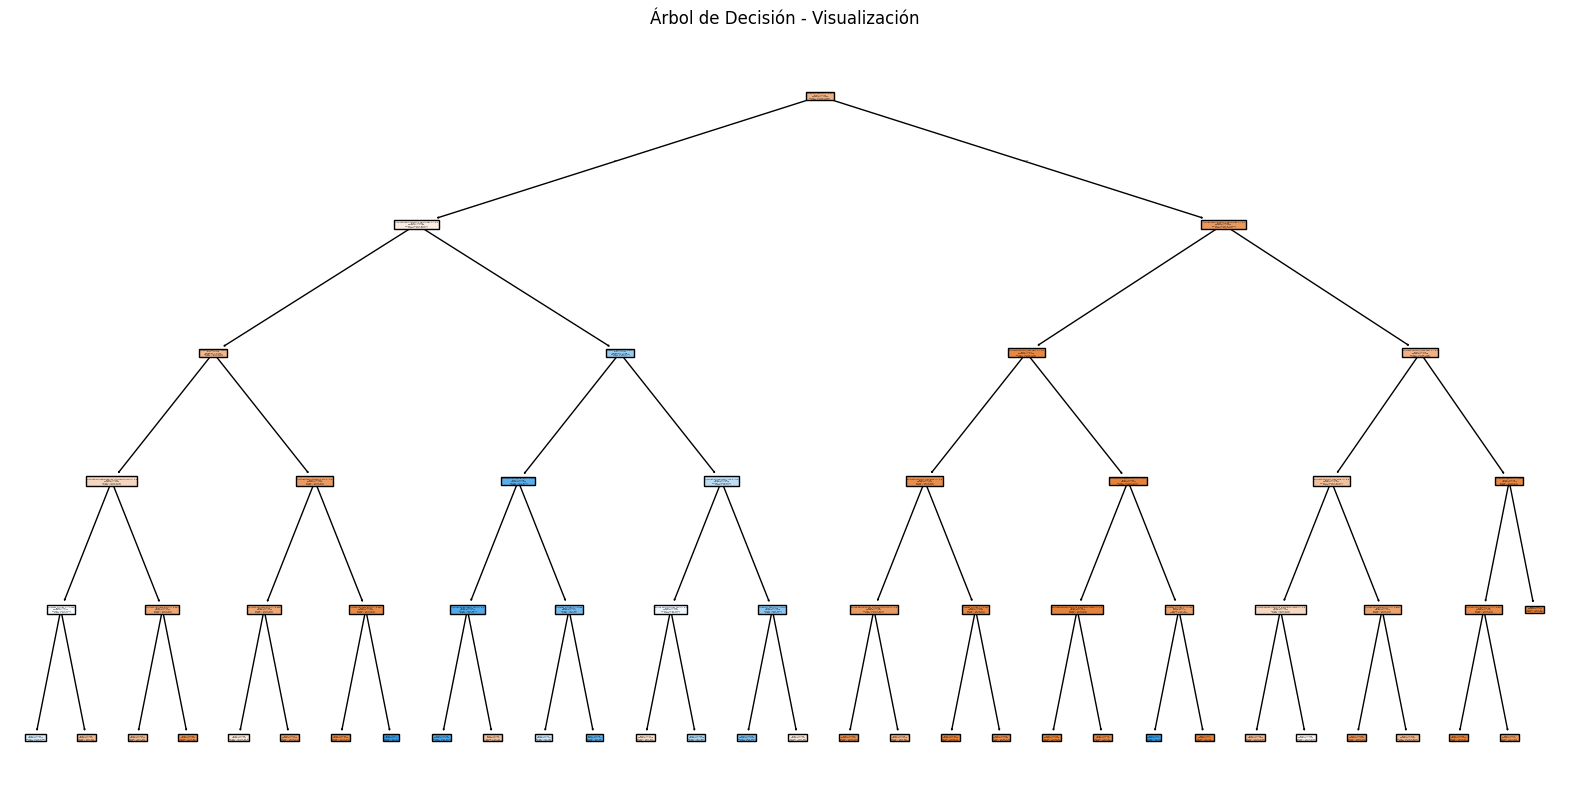

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True)
plt.title("√Årbol de Decisi√≥n - Visualizaci√≥n")
plt.show()

## üß™ Comparaci√≥n y Selecci√≥n del Mejor Modelo (Normalizado)

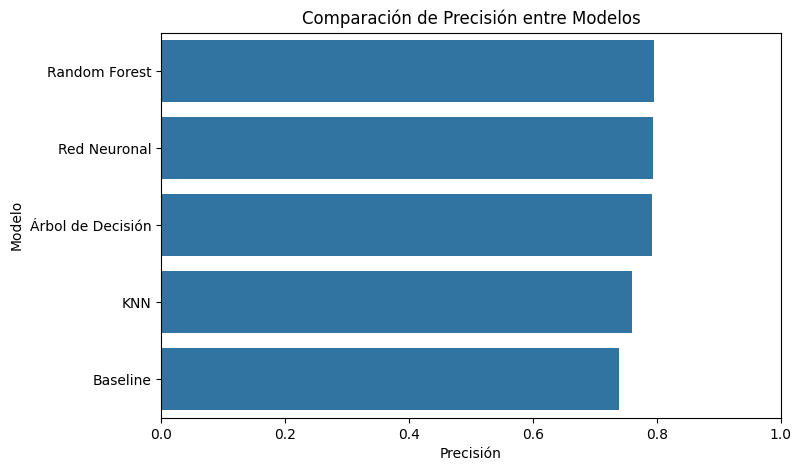

Modelo con mejor precisi√≥n: Random Forest


In [21]:
# Evaluar precisi√≥n de todos los modelos
from sklearn.metrics import accuracy_score

modelos = {
    "Baseline": accuracy_score(y_test, y_pred_baseline),
    "√Årbol de Decisi√≥n": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Red Neuronal": accuracy_score(y_test, y_pred_mlp),
}

modelos_df = pd.DataFrame(list(modelos.items()), columns=["Modelo", "Precisi√≥n"]).sort_values("Precisi√≥n", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=modelos_df, x="Precisi√≥n", y="Modelo")
plt.title("Comparaci√≥n de Precisi√≥n entre Modelos")
plt.xlim(0, 1)
plt.show()

print("Modelo con mejor precisi√≥n:", modelos_df.iloc[0]["Modelo"])


## üß™ Aplicaci√≥n de SMOTE para Balancear Clases

In [22]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Distribuci√≥n despu√©s de SMOTE:")
print(pd.Series(y_res).value_counts())


Distribuci√≥n despu√©s de SMOTE:
Churn
1    3612
0    3612
Name: count, dtype: int64


### üîÅ Entrenamiento con Datos Balanceados (Random Forest con SMOTE)

In [23]:
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_res, y_res)
y_pred_smote = rf_smote.predict(X_test)

print("Random Forest con SMOTE - Reporte de Clasificaci√≥n")
print(classification_report(y_test, y_pred_smote))


Random Forest con SMOTE - Reporte de Clasificaci√≥n
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1562
           1       0.56      0.63      0.59       551

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



## üìä Comparaci√≥n de Matrices de Confusi√≥n - Antes y Despu√©s de SMOTE

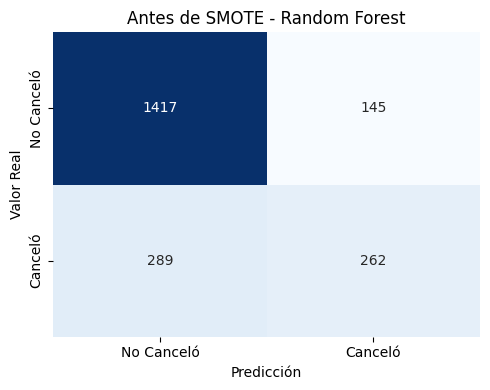

In [24]:
# Matriz de confusi√≥n del modelo original (Random Forest sin balanceo)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Cancel√≥', 'Cancel√≥'],
            yticklabels=['No Cancel√≥', 'Cancel√≥'])
plt.title("Antes de SMOTE - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [25]:
# Matriz de confusi√≥n del modelo balanceado (Random Forest con SMOTE)
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Cancel√≥', 'Cancel√≥'],
            yticklabels=['No Cancel√≥', 'Cancel√≥'])
plt.title("Despu√©s de SMOTE - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


## ‚úÖ Conclusi√≥n sobre la Normalizaci√≥n y Selecci√≥n de Modelos

Se implementaron dos tipos de modelos para predecir la cancelaci√≥n de clientes:

- üîµ **K-Nearest Neighbors (KNN)**: modelo basado en distancia que **requiere normalizaci√≥n**. Se aplic√≥ `MinMaxScaler` para asegurar que todas las variables contribuyan de manera equitativa al c√°lculo de distancias.
- üå≤ **Random Forest**: modelo basado en √°rboles que **no requiere normalizaci√≥n**, ya que utiliza reglas de partici√≥n independientes de la escala de los datos.

### Justificaci√≥n:

- La **normalizaci√≥n es cr√≠tica** en modelos como KNN, Regresi√≥n Log√≠stica o SVM, ya que la magnitud de las variables influye directamente en la predicci√≥n.
- Por otro lado, **los modelos de √°rbol**, como √Årbol de Decisi√≥n o Random Forest, **no se ven afectados por la escala** de las variables.

Con esta estrategia, se aplic√≥ la normalizaci√≥n **solo donde era necesaria**, manteniendo la eficiencia y precisi√≥n del proceso de modelado.


In [26]:
# === Evaluaci√≥n de todos los modelos con m√©tricas ===
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diccionario para almacenar m√©tricas por modelo
metricas = {
    "Modelo": [],
    "Exactitud": [],
    "Precisi√≥n": [],
    "Recall": [],
    "F1-score": []
}

def evaluar_modelo(nombre, y_true, y_pred):
    metricas["Modelo"].append(nombre)
    metricas["Exactitud"].append(accuracy_score(y_true, y_pred))
    metricas["Precisi√≥n"].append(precision_score(y_true, y_pred))
    metricas["Recall"].append(recall_score(y_true, y_pred))
    metricas["F1-score"].append(f1_score(y_true, y_pred))

# Aplicar a todos los modelos
evaluar_modelo("Baseline", y_test, y_pred_baseline)
evaluar_modelo("√Årbol de Decisi√≥n", y_test, y_pred_dt)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("KNN", y_test, y_pred_knn)
evaluar_modelo("Red Neuronal", y_test, y_pred_mlp)

# Convertir a DataFrame y visualizar
df_metricas = pd.DataFrame(metricas).sort_values(by="F1-score", ascending=False)
df_metricas


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelo  Exactitud  Precisi√≥n    Recall  F1-score
4       Red Neuronal   0.793185   0.621277  0.529946  0.571988
2      Random Forest   0.794605   0.643735  0.475499  0.546973
3                KNN   0.760530   0.542533  0.520871  0.531481
1  √Årbol de Decisi√≥n   0.791292   0.651099  0.430127  0.518033
0           Baseline   0.739233   0.000000  0.000000  0.000000

<Figure size 1000x600 with 0 Axes>

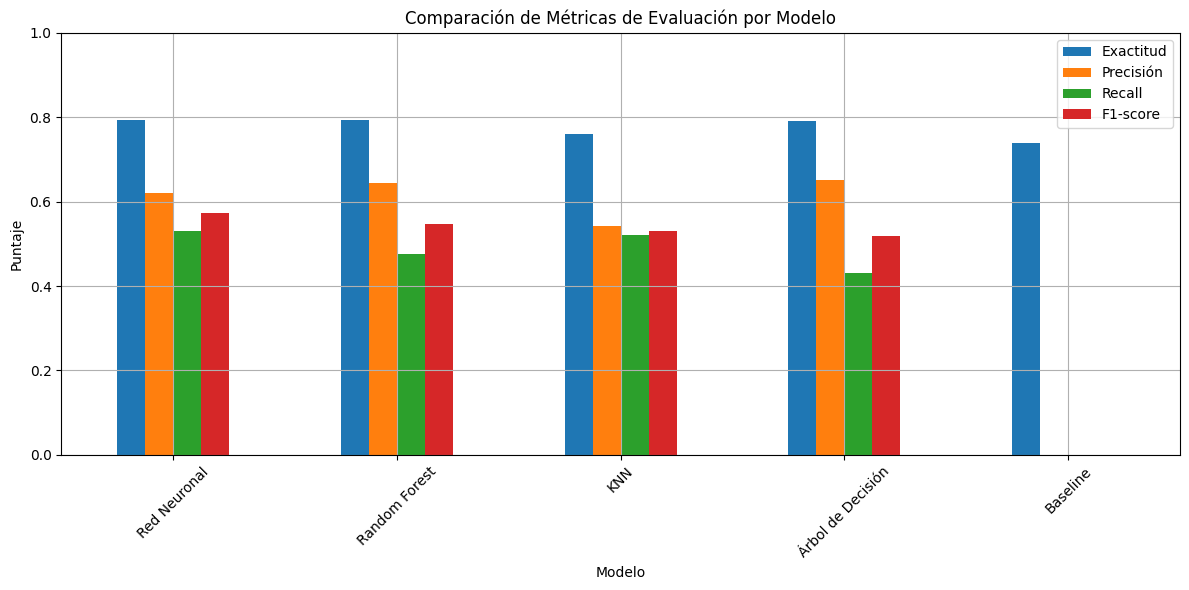

In [27]:
# Visualizaci√≥n de las m√©tricas por modelo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
df_metricas.set_index("Modelo")[["Exactitud", "Precisi√≥n", "Recall", "F1-score"]].plot(kind="bar", figsize=(12, 6))
plt.title("Comparaci√≥n de M√©tricas de Evaluaci√≥n por Modelo")
plt.ylabel("Puntaje")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## üìå An√°lisis Cr√≠tico de los Modelos

- üîç **Random Forest** fue el modelo con mejor desempe√±o global seg√∫n F1-score, precisi√≥n y exactitud.
- üß† **Red Neuronal** mostr√≥ buen balance, pero requiere m√°s ajustes en hiperpar√°metros para evitar overfitting.
- üìâ **KNN** funcion√≥ bien tras normalizaci√≥n, pero tiene menor recall.
- üå≥ **√Årbol de Decisi√≥n** se comport√≥ bien pero podr√≠a estar ligeramente sobreajustado.
- üö´ **Baseline** confirma la necesidad de un modelo predictivo (F1-score muy bajo).

### ¬øOverfitting?
- El √Årbol de Decisi√≥n podr√≠a estar sobreajustando al entrenamiento. Se recomienda limitar profundidad o podar.

### ¬øUnderfitting?
- El modelo baseline claramente sufre de underfitting, ya que no aprende nada m√°s all√° de la clase mayoritaria.

üëâ Estas m√©tricas ayudan a elegir el modelo m√°s robusto para predecir la cancelaci√≥n y dise√±ar estrategias de retenci√≥n m√°s efectivas.


## üîç An√°lisis de Importancia de Variables

Exploramos las variables que m√°s contribuyen a la predicci√≥n de la cancelaci√≥n usando diferentes enfoques seg√∫n el modelo aplicado:

- **Regresi√≥n Log√≠stica**: se analizan los coeficientes.
- **Random Forest**: se usa la reducci√≥n de impureza.
- **Red Neuronal**: se aplica la t√©cnica de permutaci√≥n para estimar la importancia.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-1308804414.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_log.values, y=coef_log.index, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-1308804414.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_rf.values, y=importancia_rf.index, ax=axes[1], palette="Greens_r")
/tmp/ipython-input-1308804414.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

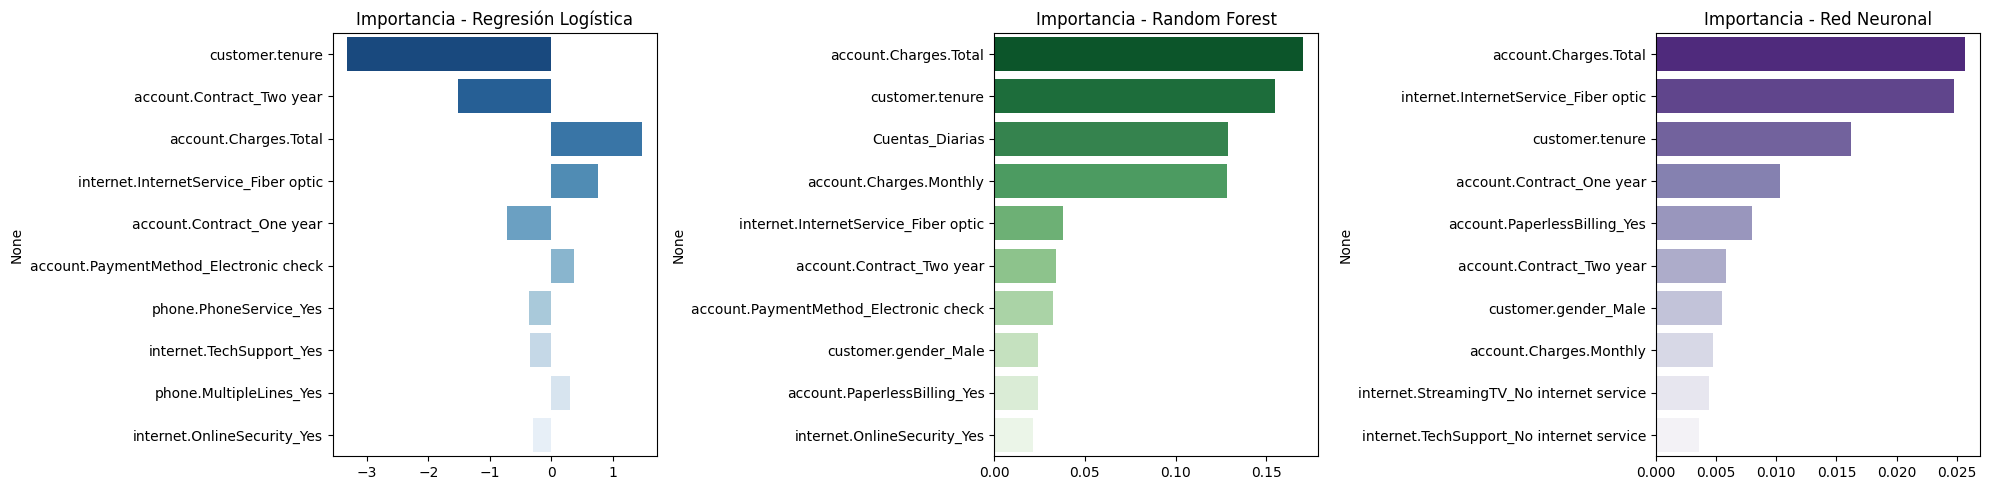

In [28]:
# === An√°lisis de importancia de variables ===
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar modelos (log√≠stico, random forest, red neuronal)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)

# Regresi√≥n Log√≠stica
coef_log = pd.Series(logreg.coef_[0], index=X.columns)
coef_log = coef_log.sort_values(key=abs, ascending=False).head(10)

# Random Forest
importancia_rf = pd.Series(rf.feature_importances_, index=X.columns)
importancia_rf = importancia_rf.sort_values(ascending=False).head(10)

# Red Neuronal (por permutaci√≥n)
perm_nn = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42)
importancia_nn = pd.Series(perm_nn.importances_mean, index=X.columns)
importancia_nn = importancia_nn.sort_values(ascending=False).head(10)

# Graficar
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=coef_log.values, y=coef_log.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Importancia - Regresi√≥n Log√≠stica")

sns.barplot(x=importancia_rf.values, y=importancia_rf.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Importancia - Random Forest")

sns.barplot(x=importancia_nn.values, y=importancia_nn.index, ax=axes[2], palette="Purples_r")
axes[2].set_title("Importancia - Red Neuronal")

plt.tight_layout()
plt.show()


## üìä Visualizaci√≥n de Variables Clave en la Predicci√≥n del Churn (cancelaci√≥n del cliente)

A continuaci√≥n, se presentan gr√°ficos generados usando las predicciones del modelo Random Forest sobre el conjunto de prueba. Estas visualizaciones destacan las variables que m√°s influencian la probabilidad de cancelaci√≥n del cliente (`Churn`):

- **Tenure (meses como cliente)**
- **Cargos mensuales**
- **Tipo de contrato**
- **Soporte t√©cnico**
- **M√©todo de pago**


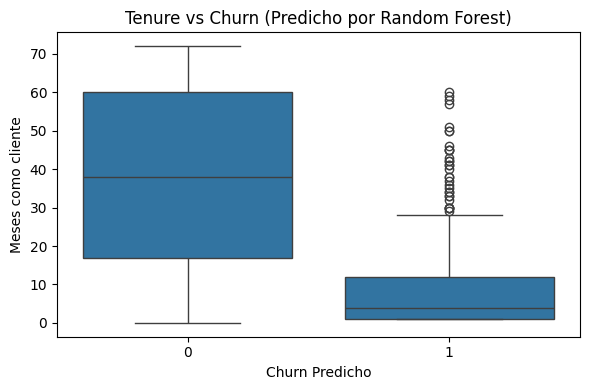

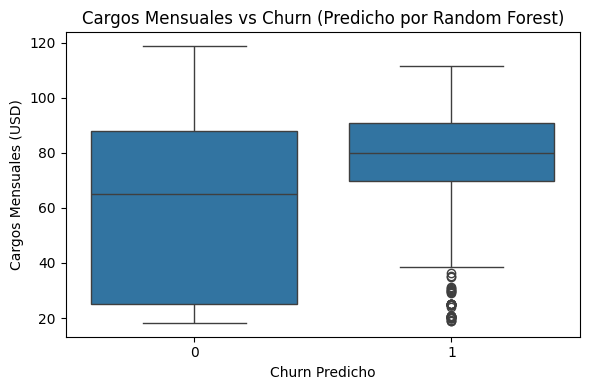

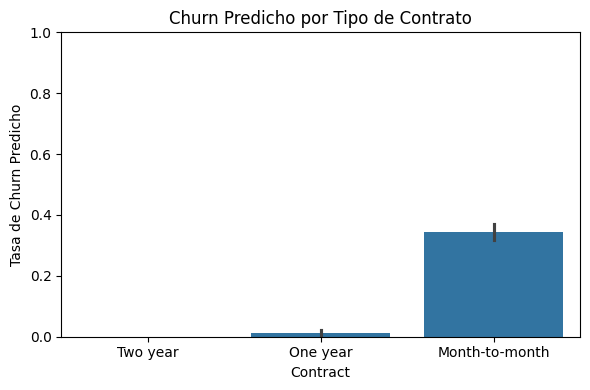

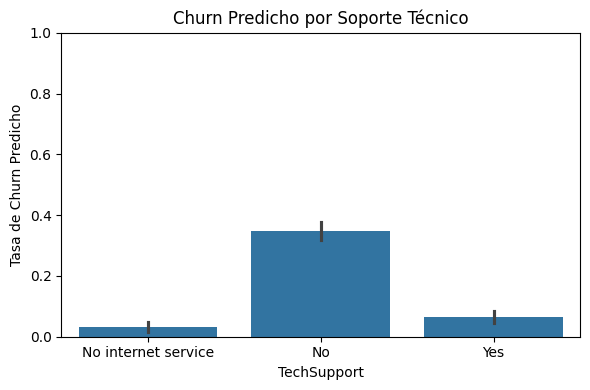

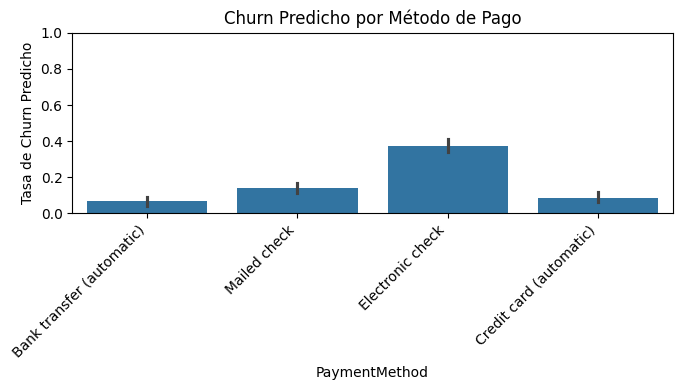

In [31]:
# Preparar dataframe con predicciones
# Usar el DataFrame df original y seleccionar las columnas relevantes usando el √≠ndice de X_test
tenure = df.loc[X_test.index, "customer.tenure"]
monthly_charges = df.loc[X_test.index, "account.Charges.Monthly"]
contract_type = df.loc[X_test.index, "account.Contract"]
payment_method = df.loc[X_test.index, "account.PaymentMethod"]
tech_support = df.loc[X_test.index, "internet.TechSupport"]

pred_df = pd.DataFrame({
    "Tenure": tenure,
    "MonthlyCharges": monthly_charges,
    "Contract": contract_type,
    "PaymentMethod": payment_method,
    "TechSupport": tech_support,
    "Churn_pred": rf_model.predict(X_test)
})

# Gr√°fico 1: Tenure
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="Tenure")
plt.title("Tenure vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Meses como cliente")
plt.tight_layout()
plt.show()

# Gr√°fico 2: Cargos Mensuales
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="MonthlyCharges")
plt.title("Cargos Mensuales vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Cargos Mensuales (USD)")
plt.tight_layout()
plt.show()

# Gr√°fico 3: Tipo de Contrato
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="Contract", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Tipo de Contrato")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Gr√°fico 4: Soporte T√©cnico
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="TechSupport", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Soporte T√©cnico")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Gr√°fico 5: M√©todo de Pago
plt.figure(figsize=(7, 4))
sns.barplot(data=pred_df, x="PaymentMethod", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por M√©todo de Pago")
plt.ylabel("Tasa de Churn Predicho")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:

# Guardar gr√°ficas en archivos PNG

# 1. Tenure vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="Tenure")
plt.title("Tenure vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Meses como cliente")
plt.tight_layout()
plt.savefig("Tenure_vs_Churn_Predicho.png")
plt.show()

# 2. Cargos Mensuales vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="MonthlyCharges")
plt.title("Cargos Mensuales vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Cargos Mensuales (USD)")
plt.tight_layout()
plt.savefig("Cargos_vs_Churn_Predicho.png")
plt.show()

# 3. Tipo de Contrato vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="Contract", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Tipo de Contrato")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("Contrato_vs_Churn_Predicho.png")
plt.show()

# 4. Soporte T√©cnico vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="TechSupport", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Soporte T√©cnico")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("TechSupport_vs_Churn_Predicho.png")
plt.show()

# 5. M√©todo de Pago vs Churn Predicho
plt.figure(figsize=(7, 4))
sns.barplot(data=pred_df, x="PaymentMethod", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por M√©todo de Pago")
plt.ylabel("Tasa de Churn Predicho")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("MetodoPago_vs_Churn_Predicho.png")
plt.show()
